<a href="https://colab.research.google.com/github/ZHAbotorabi/Supply-Chain/blob/main/Modeling_and_Forecasting_Revenue_Trend_and_Seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Effective Revenue forecasting by capturing **trend** and **seasonality**
This section emphasized the foundational importance of capturing trend and seasonality for effective forecasting. While not the most advanced model, it demonstrated the critical role of these components in creating a baseline. By incorporating additional features and leveraging advanced models, forecasting can be made more accurate and insightful.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
retail_clean= pd.read_csv('retail_clean.csv')
retail_clean.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [14]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [15]:
retail_clean.InvoiceDate

,InvoiceDate
0,2009-12-01 07:45:00
1,2009-12-01 07:45:00
2,2009-12-01 07:45:00
3,2009-12-01 07:45:00
4,2009-12-01 07:45:00
...,...
779490,2011-12-09 12:50:00
779491,2011-12-09 12:50:00
779492,2011-12-09 12:50:00
779493,2011-12-09 12:50:00


In [16]:
retail_clean['InvoiceDate']= pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean['date']= retail_clean['InvoiceDate'].dt.strftime("%Y-%m-%d")

# Ensure the 'date' column is in datetime format
retail_clean['date']=pd.to_datetime(retail_clean['date'])
retail_clean.head(2)

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01


In [17]:
retail_clean['month']= retail_clean.date.dt.month

In [18]:
retail_clean['year']= retail_clean.date.dt.year

In [21]:
# Extract week and year using isocalendar()
retail_clean['week'] = retail_clean['date'].dt.isocalendar().week


# Check the updated DataFrame columns
print(retail_clean.columns)

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date',
       'month', 'year', 'week'],
      dtype='object')


In [22]:
retail_clean.head(2)

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date,month,year,week
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,12,2009,49
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,12,2009,49


In [23]:
retail_clean.month.describe()

,month
count,779495.000000
mean,7.417110
std,3.422346
min,1.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,12.000000


In [27]:
time_series=retail_clean.groupby(['week','month','year']).agg(date= ('date','first'),
        total_revenue=('Revenue',np.sum)).reset_index().sort_values('date')
time_series.head()

<ipython-input-27-c8179b6976d2>:1: FutureWarning: The provided callable <function sum at 0x79d7128e3e20> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  time_series=retail_clean.groupby(['week','month','year']).agg(date= ('date','first'),


,week,month,year,date,total_revenue
113,49,12,2009,2009-12-01,232177.51
116,50,12,2009,2009-12-07,207908.73
118,51,12,2009,2009-12-14,207685.87
120,52,12,2009,2009-12-21,35731.90
0,1,1,2010,2010-01-04,167636.95


In [28]:
time_series.to_csv('timeseries_rev.csv')

# Moddeling

In [29]:
from sklearn.linear_model import LinearRegression

### reading timeseries if not in enviroment

#time_series=pd.read_csv('timeseries.csv')
#time_series= time_series.loc[:,'week':'total_revenue']
#time_series['date']= pd.to_datetime(time_series['date'])

In [31]:
time_series['trend']= range(time_series.shape[0])
time_series['month']= time_series['month'].astype('category')
time_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 113 to 115
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   week           121 non-null    UInt32        
 1   month          121 non-null    category      
 2   year           121 non-null    int32         
 3   date           121 non-null    datetime64[ns]
 4   total_revenue  121 non-null    float64       
 5   trend          121 non-null    int64         
dtypes: UInt32(1), category(1), datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 5.2 KB


In [32]:
####dropping columns
X= time_series.drop(['week','year','date','total_revenue'],axis=1)
X.head(2)

,month,trend
113,12,0
116,12,1


In [33]:
names=pd.get_dummies(X).columns

In [34]:
X= pd.get_dummies(X).values
y= time_series.total_revenue.values

In [35]:
X

array([[0, False, False, ..., False, False, True],
       [1, False, False, ..., False, False, True],
       [2, False, False, ..., False, False, True],
       ...,
       [118, False, False, ..., False, True, False],
       [119, False, False, ..., False, False, True],
       [120, False, False, ..., False, False, True]], dtype=object)

In [36]:
y

array([232177.51 , 207908.73 , 207685.87 ,  35731.9  , 167636.95 ,
       125493.61 , 119473.351, 143198.761, 112299.692,  80059.66 ,
       160506.402, 151693.202, 151813.96 , 118785.1  , 164459.771,
       172063.68 ,  89855.96 ,  28646.66 , 124314.76 , 141539.381,
       138922.62 , 158558.581,  12342.17 , 149102.83 , 155673.54 ,
       138681.57 , 142033.27 ,  90358.06 , 200239.71 , 126987.39 ,
       103924.84 , 114861.13 ,  55932.44 , 136775.12 , 144495.58 ,
       133616.   , 118917.03 ,  30637.95 , 117866.37 , 139842.07 ,
       154786.91 , 136279.55 ,  22811.75 , 100807.8  , 119333.94 ,
       155778.921, 223587.04 , 229506.25 ,  72886.41 , 243007.44 ,
       298614.04 , 220882.67 , 197721.45 , 262597.86 , 282707.701,
       261610.061, 246492.99 , 113051.41 , 148627.97 , 212619.13 ,
       163116.12 ,  46059.51 , 114636.8  , 154344.85 , 175452.23 ,
       104861.   ,  18806.43 ,  87149.38 ,  87827.94 , 125700.15 ,
       130380.77 ,  15026.68 , 102360.14 , 112193.93 , 137669.

In [37]:
#Use LinearRegression for prediction
model= LinearRegression()

model.fit(X,y)

model.get_params()
model.coef_

dict1= list(zip(names,model.coef_))
dict1

[('trend', -7.505876175645841),
 ('month_1', -18516.22787910649),
 ('month_2', -37733.15733208388),
 ('month_3', -14243.38974427471),
 ('month_4', -37276.2501633965),
 ('month_5', -27325.606453991233),
 ('month_6', -13591.35376355215),
 ('month_7', -24325.63528267392),
 ('month_8', -29878.992237689577),
 ('month_9', 34853.684617170366),
 ('month_10', 45011.90359930283),
 ('month_11', 89228.6442170147),
 ('month_12', 33796.380423280585)]

# Prediction

In [39]:
prediction= model.predict(X)
time_series['prediction']= prediction
time_series.head(2)

,week,month,year,date,total_revenue,trend,prediction
113,49,12,2009,2009-12-01,232177.51,0,177476.051819
116,50,12,2009,2009-12-07,207908.73,1,177468.545943


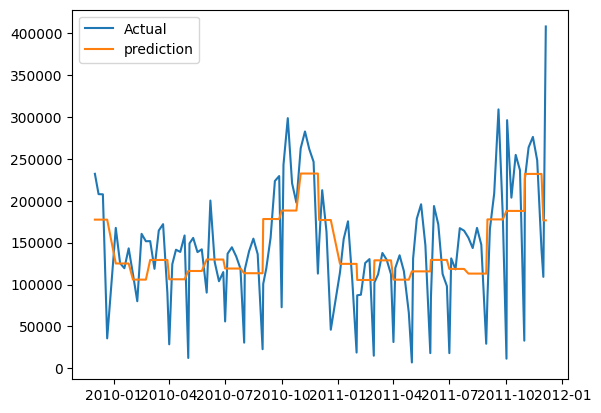

In [41]:
plt.plot(time_series.date,time_series.total_revenue,label='Actual')
plt.plot(time_series.date,time_series.prediction,label='prediction')
plt.legend(loc='upper left')
plt.show()

#Forecasting

In [42]:
max_date= time_series.date.max()
max_date

Timestamp('2011-12-05 00:00:00')

In [43]:
dates= pd.DataFrame({'date':pd.date_range('2011-12-12','2012-12-5',freq='W')})
dates.head(2)

,date
0,2011-12-18
1,2011-12-25


In [45]:
time_series= pd.concat([time_series,dates],axis=0)
time_series.head(2)

,week,month,year,date,total_revenue,trend,prediction
113,49,12,2009.0,2009-12-01,232177.51,0.0,177476.051819
116,50,12,2009.0,2009-12-07,207908.73,1.0,177468.545943


In [46]:
time_series.tail(2)

,week,month,year,date,total_revenue,trend,prediction
49,<NA>,NaN,NaN,2012-11-25,NaN,NaN,NaN
50,<NA>,NaN,NaN,2012-12-02,NaN,NaN,NaN


In [47]:
time_series['trend']= range(time_series.shape[0])
time_series['month']= time_series['date'].dt.month
time_series['month']= time_series['month'].astype('category')

In [48]:
####dropping columns
X= time_series.drop(['week','year','date','total_revenue','prediction'],axis=1)

names=pd.get_dummies(X).columns
X= pd.get_dummies(X).values

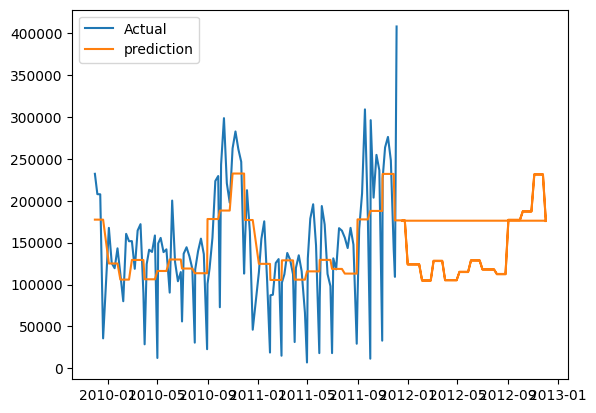

In [49]:
prediction= model.predict(X)

time_series['prediction']= prediction

plt.plot(time_series.date,time_series.total_revenue,label='Actual')
plt.plot(time_series.date,time_series.prediction,label='prediction')
plt.legend(loc='upper left')
plt.show()
